In [34]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
# from tensorflow.keras.optimizers.legacy import SGD, Adam, RMSprop
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization, Add, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam



# importing of service libraries
import numpy as np
import matplotlib.pyplot as plt

print('Libraries imported.')

Libraries imported.


In [35]:
BATCH_SIZE = 128
N_EPOCH = 20 # use 20 for best initial results
N_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()

print('Main variables initialised.')

Main variables initialised.


In [36]:
IMG_CHANNELS = 3
IMG_ROWS = 32
IMG_COLS = 32

print('Image variables initialisation')

Image variables initialisation


In [37]:
#load dataset
(input_X_train, output_y_train), (input_X_test, output_y_test) = cifar10.load_data()
print('input_X_train shape:', input_X_train.shape)
print(input_X_train.shape[0], 'train samples')
print(input_X_test.shape[0], 'test samples')
 
# convert to categorical
output_Y_train = utils.to_categorical(output_y_train, N_CLASSES)
output_Y_test = utils.to_categorical(output_y_test, N_CLASSES) 

# float and normalization
input_X_train = input_X_train.astype('float32')
input_X_test = input_X_test.astype('float32')
input_X_train /= 255
input_X_test /= 255

input_X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [38]:
results = []

def basicCNN(input_shape):
    inputs = Input(shape=input_shape)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    x = MaxPooling2D((2, 2))(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    outputs = Dense(10, activation='softmax')(x)
    model = Model(inputs, outputs)
    return model

model1 = basicCNN((32, 32, 3))
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(f"Training basic...")
history1 = model1.fit(input_X_train, output_Y_train, epochs=10, batch_size=64, validation_split=0.2, verbose=1)
test_loss1, test_accuracy1 = model1.evaluate(input_X_test, output_Y_test, verbose=0)
results.append(("basic", test_accuracy1, test_loss1))
print(f"basic - Test Accuracy: {test_accuracy1}, Test Loss: {test_loss1}")

Training basic...
Epoch 1/10
625/625 [==============================] - 12s 19ms/step - loss: 1.5653 - accuracy: 0.4422 - val_loss: 1.3412 - val_accuracy: 0.5386
Epoch 2/10
625/625 [==============================] - 13s 21ms/step - loss: 1.2556 - accuracy: 0.5591 - val_loss: 1.2411 - val_accuracy: 0.5677
Epoch 3/10
625/625 [==============================] - 13s 22ms/step - loss: 1.1422 - accuracy: 0.5994 - val_loss: 1.1592 - val_accuracy: 0.6020
Epoch 4/10
625/625 [==============================] - 14s 22ms/step - loss: 1.0609 - accuracy: 0.6274 - val_loss: 1.1075 - val_accuracy: 0.6154
Epoch 5/10
625/625 [==============================] - 14s 22ms/step - loss: 0.9896 - accuracy: 0.6543 - val_loss: 1.1226 - val_accuracy: 0.6085
Epoch 6/10
625/625 [==============================] - 13s 21ms/step - loss: 0.9327 - accuracy: 0.6747 - val_loss: 1.0881 - val_accuracy: 0.6229
Epoch 7/10
625/625 [==============================] - 14s 22ms/step - loss: 0.8730 - accuracy: 0.6959 - val_loss: 1.05

In [39]:
def deeperCNN(input_shape):
    inputs = Input(shape=input_shape)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Flatten()(x)
    x = Dense(256, activation='relu')(x)
    outputs = Dense(10, activation='softmax')(x)
    model = Model(inputs, outputs)
    return model

model2 = deeperCNN((32, 32, 3))
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(f"Training deeper...")
history2 = model2.fit(input_X_train, output_Y_train, epochs=10, batch_size=64, validation_split=0.2, verbose=1)
test_loss2, test_accuracy2 = model2.evaluate(input_X_test, output_Y_test, verbose=0)
results.append(("deeper", test_accuracy2, test_loss2))
print(f"deeper - Test Accuracy: {test_accuracy2}, Test Loss: {test_loss2}")

Training deeper...
Epoch 1/10
625/625 [==============================] - 53s 84ms/step - loss: 1.4373 - accuracy: 0.4811 - val_loss: 1.1075 - val_accuracy: 0.6047
Epoch 2/10
625/625 [==============================] - 53s 85ms/step - loss: 0.9759 - accuracy: 0.6566 - val_loss: 0.8843 - val_accuracy: 0.6923
Epoch 3/10
625/625 [==============================] - 52s 84ms/step - loss: 0.7726 - accuracy: 0.7314 - val_loss: 0.7963 - val_accuracy: 0.7230
Epoch 4/10
625/625 [==============================] - 52s 83ms/step - loss: 0.6187 - accuracy: 0.7836 - val_loss: 0.7755 - val_accuracy: 0.7342
Epoch 5/10
625/625 [==============================] - 51s 81ms/step - loss: 0.4774 - accuracy: 0.8317 - val_loss: 0.7666 - val_accuracy: 0.7529
Epoch 6/10
625/625 [==============================] - 50s 80ms/step - loss: 0.3456 - accuracy: 0.8806 - val_loss: 0.8171 - val_accuracy: 0.7525
Epoch 7/10
625/625 [==============================] - 51s 82ms/step - loss: 0.2395 - accuracy: 0.9172 - val_loss: 1.0

In [40]:
def resnetLikeCNN(input_shape):
    inputs = Input(shape=input_shape)
    x = Conv2D(32, (3, 3), padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x1 = Conv2D(32, (3, 3), padding='same')(x)
    x1 = BatchNormalization()(x1)
    x1 = Activation('relu')(x1)
    x1 = Conv2D(32, (3, 3), padding='same')(x1)
    x1 = BatchNormalization()(x1)
    x = Add()([x, x1])
    x = Activation('relu')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    outputs = Dense(10, activation='softmax')(x)
    model = Model(inputs, outputs)
    return model

model3 = resnetLikeCNN((32, 32, 3))
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(f"Training resnetLike...")
history3 = model3.fit(input_X_train, output_Y_train, epochs=10, batch_size=64, validation_split=0.2, verbose=1)
test_loss3, test_accuracy3 = model3.evaluate(input_X_test, output_Y_test, verbose=0)
results.append(("resnetLike", test_accuracy3, test_loss3))
print(f"resnetLike - Test Accuracy: {test_accuracy3}, Test Loss: {test_loss3}")

Training resnetLike...
Epoch 1/10
625/625 [==============================] - 60s 95ms/step - loss: 1.8274 - accuracy: 0.3678 - val_loss: 1.4661 - val_accuracy: 0.4666
Epoch 2/10
625/625 [==============================] - 60s 96ms/step - loss: 1.2485 - accuracy: 0.5398 - val_loss: 1.3622 - val_accuracy: 0.5245
Epoch 3/10
625/625 [==============================] - 59s 95ms/step - loss: 1.0629 - accuracy: 0.6145 - val_loss: 1.1897 - val_accuracy: 0.5748
Epoch 4/10
625/625 [==============================] - 59s 95ms/step - loss: 0.9534 - accuracy: 0.6542 - val_loss: 1.0924 - val_accuracy: 0.6029
Epoch 5/10
625/625 [==============================] - 59s 95ms/step - loss: 0.8906 - accuracy: 0.6807 - val_loss: 1.1777 - val_accuracy: 0.5957
Epoch 6/10
625/625 [==============================] - 59s 95ms/step - loss: 0.8365 - accuracy: 0.6995 - val_loss: 1.2726 - val_accuracy: 0.5732
Epoch 7/10
625/625 [==============================] - 60s 96ms/step - loss: 0.7876 - accuracy: 0.7190 - val_loss:

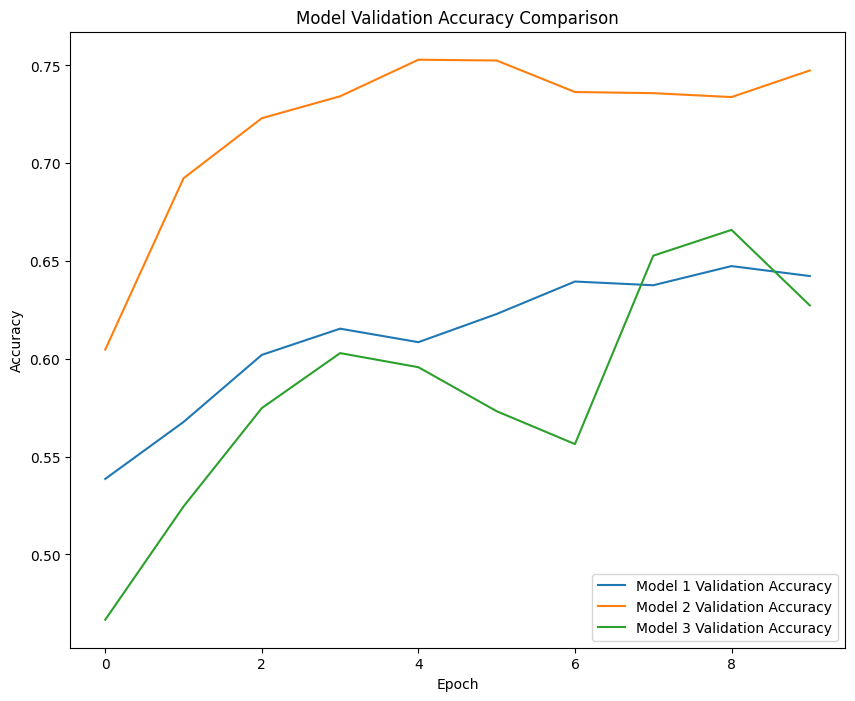

In [41]:
import matplotlib.pyplot as plt

# Assuming history1, history2, history3 are your model training histories
def plot_validation_accuracy(history1, history2, history3):
    plt.figure(figsize=(10, 8))
    plt.plot(history1.history['val_accuracy'], label='Model 1 Validation Accuracy')
    plt.plot(history2.history['val_accuracy'], label='Model 2 Validation Accuracy')
    plt.plot(history3.history['val_accuracy'], label='Model 3 Validation Accuracy')
    plt.title('Model Validation Accuracy Comparison')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()

plot_validation_accuracy(history1, history2, history3)


313/313 [==============================] - 1s 3ms/step


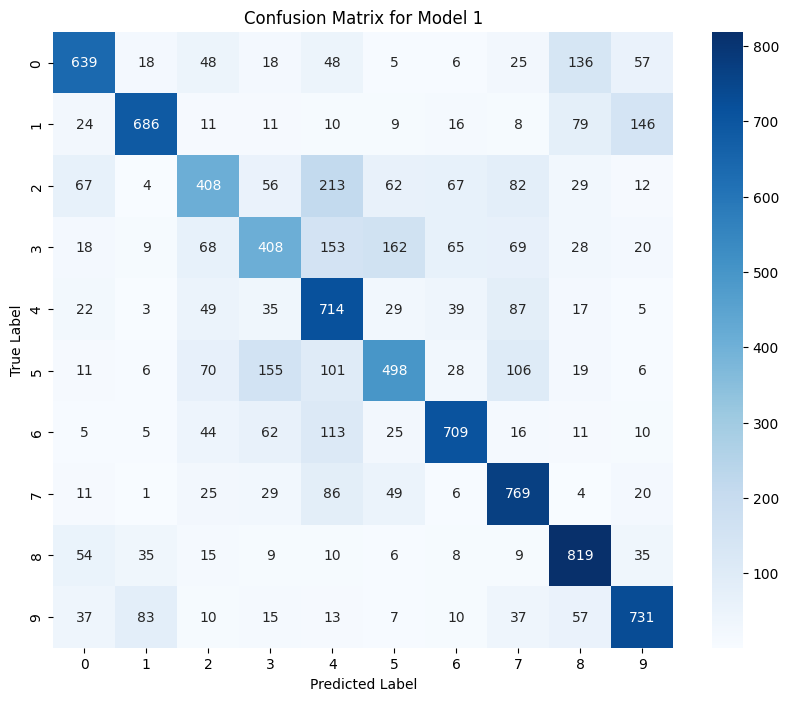

313/313 [==============================] - 4s 12ms/step


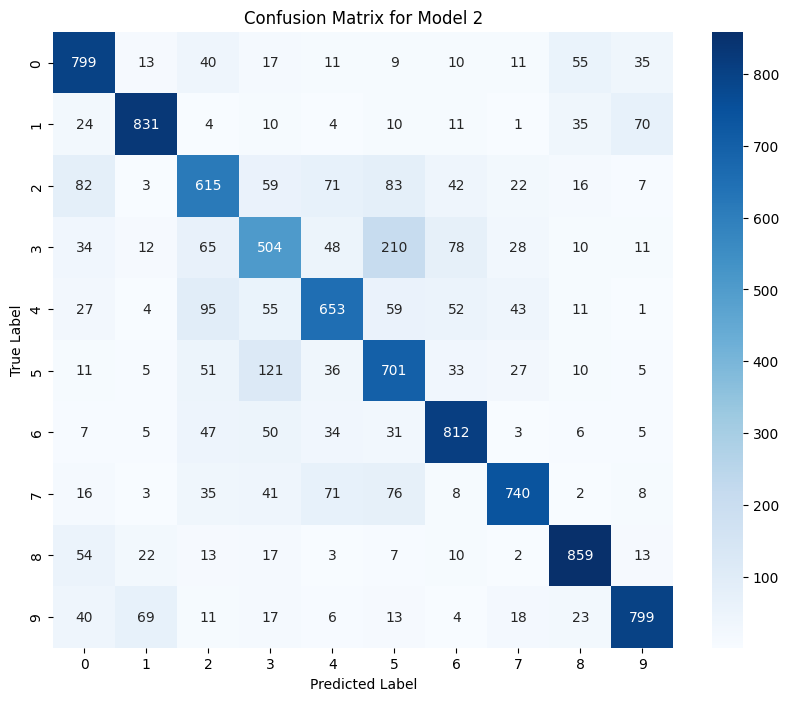

313/313 [==============================] - 6s 19ms/step


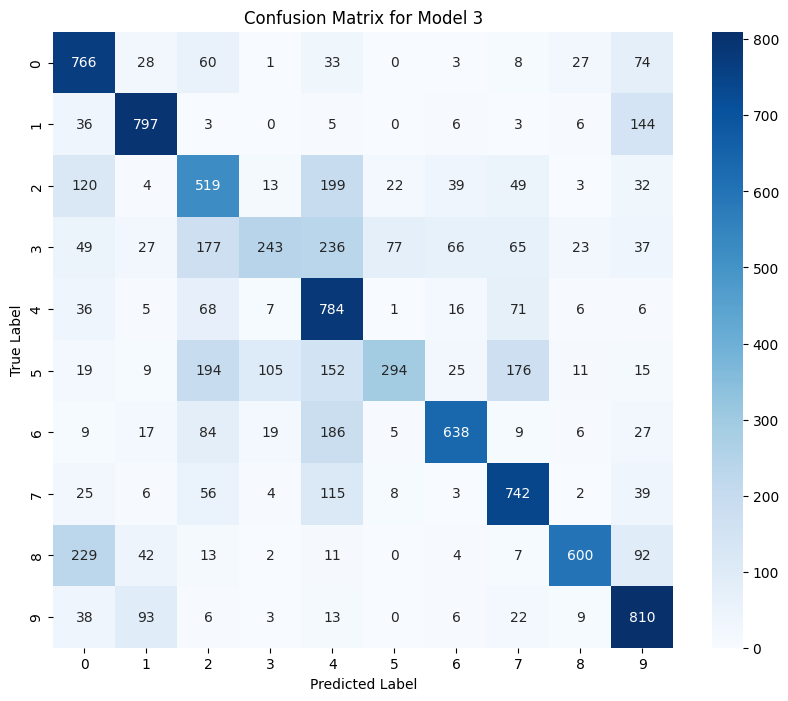

In [44]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Function to predict and plot confusion matrix
def plot_confusion_matrix(model, input_X_test, output_Y_test, title='Confusion Matrix'):
    predictions = model.predict(input_X_test)
    predictions = np.argmax(predictions, axis=1)  # Convert predictions to label index
    true_labels = np.argmax(output_Y_test, axis=1)  # True labels
    matrix = confusion_matrix(true_labels, predictions)
    plt.figure(figsize=(10, 8))
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1,2,3,4,5,6,7,8,9], yticklabels=[0,1,2,3,4,5,6,7,8,9])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(title)
    plt.show()

# Assuming you have your test data loaded into input_X_test and output_Y_test
plot_confusion_matrix(model1, input_X_test, output_Y_test, title='Confusion Matrix for Model 1')
plot_confusion_matrix(model2, input_X_test, output_Y_test, title='Confusion Matrix for Model 2')
plot_confusion_matrix(model3, input_X_test, output_Y_test, title='Confusion Matrix for Model 3')

In [47]:
import pandas as pd

# Assuming you have these variables available from your model evaluations
# model1, model2, model3 refer to your trained models
# history1, history2, history3 contain the training history of each model respectively

def create_results_dataframe(model, history, test_loss, test_accuracy):
    # Extracting data from the training history
    epochs = range(1, len(history.history['accuracy']) + 1)
    val_accuracy = history.history['val_accuracy']
    val_loss = history.history['val_loss']
    train_accuracy = history.history['accuracy']
    train_loss = history.history['loss']
    
    # Creating the DataFrame
    df = pd.DataFrame({
        'Epoch': epochs,
        'Training Accuracy': train_accuracy,
        'Training Loss': train_loss,
        'Validation Accuracy': val_accuracy,
        'Validation Loss': val_loss
    })
    
    # Adding test results which are constant for all rows as they are single valued
    df['Test Loss'] = test_loss
    df['Test Accuracy'] = test_accuracy
    
    return df

# Generate DataFrames for each model
df_model1 = create_results_dataframe(model1, history1, test_loss1, test_accuracy1)
df_model2 = create_results_dataframe(model2, history2, test_loss2, test_accuracy2)
df_model3 = create_results_dataframe(model3, history3, test_loss3, test_accuracy3)

# Displaying one of the DataFrames as an example
print(df_model1)
print(df_model2)
print(df_model3)


   Epoch  Training Accuracy  Training Loss  Validation Accuracy  \
0      1           0.442225       1.565343               0.5386   
1      2           0.559100       1.255593               0.5677   
2      3           0.599450       1.142154               0.6020   
3      4           0.627425       1.060863               0.6154   
4      5           0.654350       0.989640               0.6085   
5      6           0.674750       0.932704               0.6229   
6      7           0.695925       0.873024               0.6395   
7      8           0.714350       0.826886               0.6376   
8      9           0.725700       0.786297               0.6474   
9     10           0.742175       0.744375               0.6423   

   Validation Loss  Test Loss  Test Accuracy  
0         1.341219   1.064373         0.6381  
1         1.241061   1.064373         0.6381  
2         1.159158   1.064373         0.6381  
3         1.107489   1.064373         0.6381  
4         1.122603   1.0643